In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [18]:
print('Feature names:', data.feature_names)
print('Target names:', data.target_names)

X = data.data
y = data.target

print('X.shape:', X.shape)
print('y.shape:', y.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
X.shape: (150, 4)
y.shape: (150,)


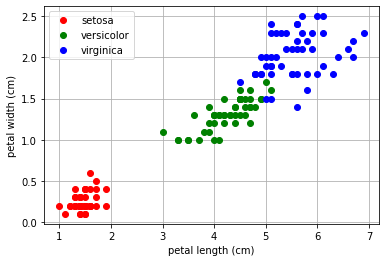

In [10]:
feature1 = 2
feature2 = 3

for c in range(3):
    plt.plot(X[y == c, feature1], X[y == c, feature2], 'rgb'[c] + 'o', label=data.target_names[c])
plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])
plt.grid()
plt.legend()

In [14]:
X = (X - X.min(axis=0))/ (X.max(axis=0)  - X.min(axis=0))
print(X)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [19]:
X = (X - X.mean(axis=0))/ X.std(axis=0)
print(X)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [22]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import to_categorical, plot_model

In [33]:
# input = 4
# hidden = [10]
# output = 3

model = Sequential()

model.add(Dense(10, activation='relu', input_dim=4))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(7, activation='relu'))

model.add(Dense(3, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
None


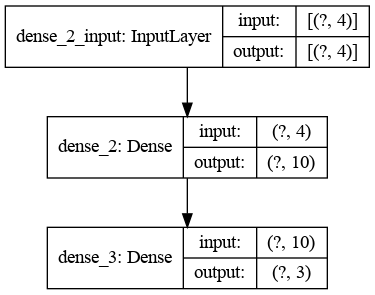

In [25]:
plot_model(model, show_shapes=True)

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy')

In [29]:
y = to_categorical(y)

In [35]:
model.fit(X, y)

5/5 [==============================] - 0s 2ms/step - loss: 1.2047


In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [37]:
model.fit(X, y)

5/5 [==============================] - 0s 652us/step - loss: 1.1599 - acc: 0.4000


In [38]:
history = model.fit(X, y, epochs=100, batch_size=8)

Epoch 1/100
19/19 [==============================] - 0s 870us/step - loss: 1.0655 - acc: 0.4333
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.9425 - acc: 0.5733
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.8443 - acc: 0.6600
Epoch 4/100
19/19 [==============================] - 0s 954us/step - loss: 0.7695 - acc: 0.7000
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.7065 - acc: 0.7533
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6575 - acc: 0.7800
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6136 - acc: 0.7800
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5778 - acc: 0.8000
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5458 - acc: 0.8067
Epoch 10/100
19/19 [==============================] - 0s 848us/step - loss: 0.5190 - acc: 0.7933
Epoch 11/100
19/19 [==============================] -

19/19 [==============================] - 0s 1ms/step - loss: 0.1392 - acc: 0.9533
Epoch 87/100
19/19 [==============================] - 0s 767us/step - loss: 0.1377 - acc: 0.9467
Epoch 88/100
19/19 [==============================] - 0s 746us/step - loss: 0.1358 - acc: 0.9467
Epoch 89/100
19/19 [==============================] - 0s 1ms/step - loss: 0.1345 - acc: 0.9533
Epoch 90/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1333 - acc: 0.9533
Epoch 91/100
19/19 [==============================] - 0s 1ms/step - loss: 0.1315 - acc: 0.9467
Epoch 92/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1295 - acc: 0.9533
Epoch 93/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1278 - acc: 0.9600
Epoch 94/100
19/19 [==============================] - 0s 739us/step - loss: 0.1264 - acc: 0.9667
Epoch 95/100
19/19 [==============================] - 0s 1ms/step - loss: 0.1248 - acc: 0.9667
Epoch 96/100
19/19 [==============================] - 0s 

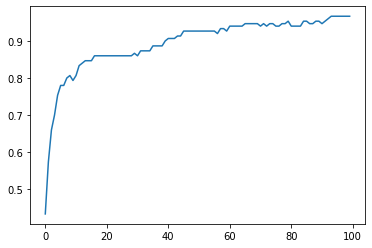

In [39]:
plt.plot(history.history['acc'])

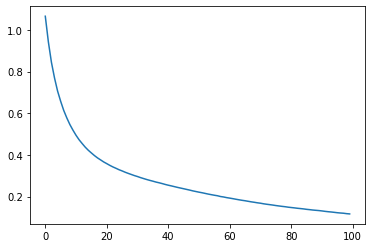

In [40]:
plt.plot(history.history['loss'])

In [41]:
model.evaluate(X, y)

5/5 [==============================] - 0s 972us/step - loss: 0.1159 - acc: 0.9667


[0.11588107794523239, 0.9666666388511658]

In [42]:
h = model.predict(X[:10])
print(h)

[[9.9769670e-01 2.2729461e-03 3.0385776e-05]
 [9.9181503e-01 8.1515256e-03 3.3444889e-05]
 [9.9866915e-01 1.3192890e-03 1.1536765e-05]
 [9.9828404e-01 1.7022111e-03 1.3700790e-05]
 [9.9848962e-01 1.4840896e-03 2.6320886e-05]
 [9.9257433e-01 7.1482966e-03 2.7739879e-04]
 [9.9918514e-01 8.0084777e-04 1.4030365e-05]
 [9.9787521e-01 2.0989906e-03 2.5802947e-05]
 [9.9818605e-01 1.8042513e-03 9.6124459e-06]
 [9.9493355e-01 5.0422000e-03 2.4347921e-05]]


In [43]:
print(h.argmax(axis=1))

[0 0 0 0 0 0 0 0 0 0]


In [44]:
model.save('iris.h5')

In [ ]:
model = load_model('iris.h5')

In [ ]:
model.weights